In [1]:
import pandas as pd
df = pd.read_csv('Smoking Data.csv')
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


# Separaing Target & Features

In [2]:
x = df.drop('smoker', axis=1)
y = df['smoker']

x.head()

,region,age,sex,bmi,children
0,southwest,19,female,27.900,0
1,southeast,18,male,33.770,1
2,southeast,28,male,33.000,3
3,northwest,33,male,22.705,0
4,northwest,32,male,28.880,0


In [3]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

# Convert Categorical Data to Numerical Data

In [4]:
from pandas.core.dtypes.common import is_numeric_dtype # ??
from sklearn.preprocessing import LabelEncoder

for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

In [5]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


In [6]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

# Spliting the Data 70:30 ratio

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.70, random_state=42)

# Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fitting the Model

In [9]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

# Testing the Model

In [10]:
pred = clf.predict(x_test)
pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no

In [11]:
df_pred = pd.DataFrame(pred, columns=['predicted_smoker'])
df_pred.head()

,predicted_smoker
0,no
1,no
2,no
3,no
4,no


# Performance Evaluation

In [12]:
clf.score(x_test, y_test)

0.6666666666666666

[Text(503.4605184406019, 319.63680000000005, 'bmi <= 40.532\ngini = 0.33\nsamples = 936\nvalue = [741, 195]'),
 Text(460.2827065172435, 306.59040000000005, 'bmi <= 37.085\ngini = 0.324\nsamples = 891\nvalue = [710, 181]'),
 Text(412.5567594330618, 293.54400000000004, 'bmi <= 37.06\ngini = 0.337\nsamples = 807\nvalue = [634, 173]'),
 Text(410.2844255058539, 280.49760000000003, 'bmi <= 34.102\ngini = 0.335\nsamples = 805\nvalue = [634, 171]'),
 Text(361.5573977157037, 267.45120000000003, 'bmi <= 32.933\ngini = 0.321\nsamples = 683\nvalue = [546, 137]'),
 Text(326.4505042631713, 254.40480000000002, 'bmi <= 32.425\ngini = 0.333\nsamples = 621\nvalue = [490, 131]'),
 Text(292.59406019343345, 241.35840000000002, 'bmi <= 31.808\ngini = 0.326\nsamples = 600\nvalue = [477, 123]'),
 Text(243.05984347162126, 228.312, 'children <= 2.5\ngini = 0.336\nsamples = 561\nvalue = [441, 120]'),
 Text(175.02297022143037, 215.2656, 'age <= 47.5\ngini = 0.32\nsamples = 470\nvalue = [376, 94]'),
 Text(79.49618

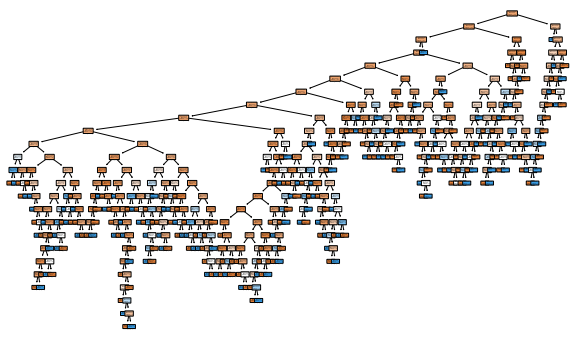

In [13]:
from sklearn import tree 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)

# Assignment: Confusion Matrix

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [15]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

In [16]:
import numpy as np
df.columns


Index(['region', 'age', 'sex', 'bmi', 'children', 'smoker'], dtype='object')

In [17]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype

for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    df[column] = le.fit_transform(df[column])
    
df.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,1
1,2,18,1,33.770,1,0
2,2,28,1,33.000,3,0
3,1,33,1,22.705,0,0
4,1,32,1,28.880,0,0


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
df.smoker = le.fit_transform(df.smoker)
df.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,1
1,2,18,1,33.770,1,0
2,2,28,1,33.000,3,0
3,1,33,1,22.705,0,0
4,1,32,1,28.880,0,0


In [36]:
import seaborn as sns 
df.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [37]:
274 / ((274+1064)) # 20.47% are smoker

0.20478325859491778

In [22]:
1064 / (1064+274) # near 79.52% are non-smoker

0.7952167414050823

<AxesSubplot:xlabel='smoker', ylabel='count'>

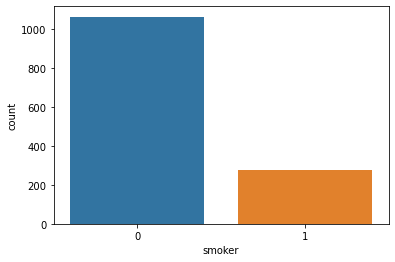

In [23]:
sns.countplot(x='smoker', data=df)

<AxesSubplot:xlabel='count', ylabel='smoker'>

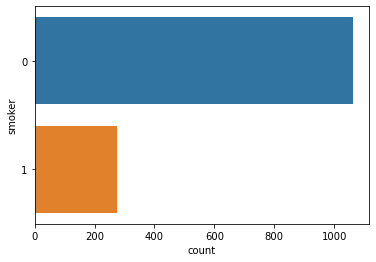

In [24]:
sns.countplot(y='smoker', data=df)

<AxesSubplot:xlabel='children', ylabel='count'>

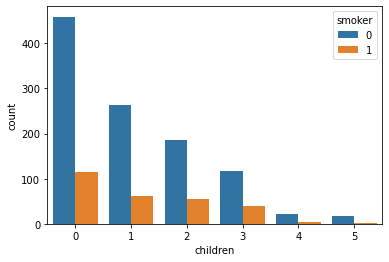

In [25]:
sns.countplot(x='children', data=df, hue='smoker')

<AxesSubplot:xlabel='sex', ylabel='count'>

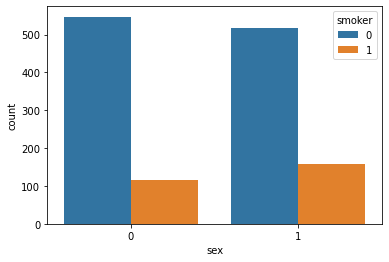

In [26]:
sns.countplot(x='sex', data=df, hue='smoker')

<AxesSubplot:xlabel='region', ylabel='count'>

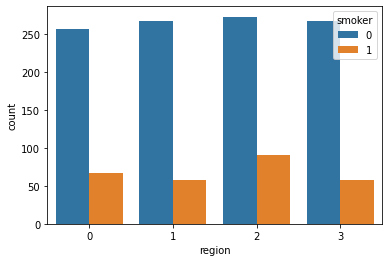

In [27]:
sns.countplot(x='region', data=df, hue='smoker')

In [29]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(df.drop('smoker', axis=1), df['smoker'], train_size=.70, random_state=1)

In [30]:
xtrain.head()

,region,age,sex,bmi,children
744,1,50,1,26.41,0
363,3,21,0,26.40,1
10,0,25,1,26.22,0
970,2,50,0,28.16,3
634,3,51,1,39.70,1


In [31]:
ytrain.head()

744    0
363    0
10     0
970    0
634    0
Name: smoker, dtype: int64

In [32]:
ytrain.value_counts()

0    743
1    193
Name: smoker, dtype: int64

In [34]:
193/(193+743) # 20.61% are smoker; previous: 20.47% are smoker

0.20619658119658119

In [38]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [39]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [40]:
testing_result = clf.predict(xtest)
testing_result # predicted result

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,

In [41]:
import numpy as np # comparison between trained and actual data
np.array(ytest) # actual result

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [42]:
clf.score(xtest, ytest)

0.6716417910447762

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [45]:
print(classification_report(ytest, testing_result))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       321
           1       0.19      0.20      0.20        81

    accuracy                           0.67       402
   macro avg       0.49      0.49      0.49       402
weighted avg       0.67      0.67      0.67       402



In [46]:
xtest.shape

(402, 5)

# Confusion Metrics

In [47]:
confusion_matrix(ytest, testing_result)

array([[254,  67],
       [ 65,  16]])

In [49]:
confusion = confusion_matrix(ytest, testing_result)
confusion

array([[254,  67],
       [ 65,  16]])

In [ ]:
# Accuracy = (TP+TN) / (TP+FP + TN+FN)

In [61]:
accuracy = (254+67)/(254+65+67+16)
accuracy

0.7985074626865671

In [ ]:
# Precision or Positive Predictive Value PPV: PPV = TP/ (TP + FP)

In [62]:
precision = 254/(254+65)
precision

0.7962382445141066

In [ ]:
# Sensitivity, Recall, Hit Rate or TPR = TP/(TP+FN)

In [63]:
recall = 254/(254+16)
recall

0.9407407407407408

In [ ]:
# 1-Specificity or FPR = FP/(FP+TN)

In [64]:
fpr = 65/(65+67)
fpr

0.49242424242424243

In [ ]:
# Specificity, Selectivity or TNR= TN / (TN+FP)

In [65]:
tnr = 67/(67+65)
tnr

0.5075757575757576

In [ ]:
# F1 Measure = (Precision + Recall)/2

In [67]:
f1_measure = (precision + recall)/2
f1_measure

0.8684894926274237

In [ ]:
# Harmonic Mean, F1 Score F1= (2*Precision*Recall) / (Precision+Recall)

In [68]:
f1_score = (2*precision*recall)/(precision+recall )
f1_score

0.8624787775891342

In [ ]:
# Threat Score(TS) or Critical Success Index CSI: CSI=TP/(TP+FN+FP)

In [70]:
csi = 254/(254+16+65)
csi

0.7582089552238805

In [ ]:
# False Discovery Rate: FDR=FP/(TP+FP)

In [71]:
fdr = 65/(254+65)
fdr

0.20376175548589343